## EE521- Digital Signal Processing Lab
## Final Assignment
### Group - 2


####     QUESTION  :
  Design a 5th-order high-pass Butterworth filter sampling frequency is 500Hz with a cut-off frequency of 150 Hz. Plot its magnitude and phase responses.
 Generate a random composite signal of 100 Hz and 200 Hz with a sampling frequency
 is 500 Hz. Use this designed filter to process the generated signal.
 Hz with a cut-off frequency of 150 Hz. Plot its magnitude and phase responses.
 Generate a random composite signal of 100 Hz and 200 Hz with a sampling frequency
 is 500 Hz. Use this designed filter to process the generated signal.

### BUTTERWORTH FILTER:
A Butterworth filter is a type of signal processing filter designed to have a frequency response as flat as possible in the passband. In a high-pass Butterworth filter, it allows signals with frequencies higher than a certain cutoff frequency to pass through while attenuating lower frequencies.

#### DESIGN PROCESS

The design of a 5th order Butterworth high-pass filter typically involves the following steps:

Selecting Parameters:

Determine the cutoff frequency and the filter order. 
The cutoff frequency is the frequency below which the filter starts attenuating the signal, and the filter order determines the steepness of the roll-off.

Designing the Filter: 

Use filter design techniques to compute the filter coefficients. For Butterworth filters, these coefficients can be computed using formulas derived from analog filter design methods such as the bilinear transformation or the impulse invariance method.

Applying the Filter: 

Implement the filter using digital signal processing techniques such as convolution or recursive filtering. Apply the filter to the input signal to obtain the filtered output.

### CALCULATING FILTER COEEFICIENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, butter, lfilter

# Sampling frequency and cutoff frequency
fs = 500  # Hz
fc = 150  # Hz
order = 5  # Filter order

# Calculate normalized cutoff frequency
fc_norm = fc / (fs / 2)

# Design the filter
b, a = butter(order, fc_norm, btype='high', analog=False)

# Print filter coefficients
print("Filter Coefficients:")
print("b =", b)
print("a =", a)

Filter Coefficients:
b = [ 0.02193962 -0.1096981   0.21939621 -0.21939621  0.1096981  -0.02193962]
a = [1.         0.98532524 0.97384933 0.38635656 0.11116384 0.01126351]


###   Design of IIR filters using Bilinear Transformation: 
Steps to design digital filter using bilinear transform technique: 
1. From the given specifications, find the order(N) ,cutoff frequency(Fc) and sampling frequency (Fs)
2. Normalized Transfer Function Ha(s) of the butterworth high pass analog filter wither order 5.

           Ha(S) = 1/((S+1) * (1+0.61803 *S+S**2) * (1+1.61803 *S+S**2))
3. Find the cuttoff frequency in digital domain :
                               
                               Wc = 2*pi*fc/fs 
                               Wc = cutoff frequency in Rad/Sec
                               Fc = cutoff frequency in HZ
                               Fs  = Sampling frequency in HZ
4.  To find Transfer function of H(s) for High pass filter replace S = Wc/S in Ha(S) i.e Normalized Transfer Function: 
    
    
    
        H(S) = (S**5)/ ((Wc + S) * ((Wc)**2 + 0.61803 *(Wc*S) + S**2) * ((Wc)**2 + 1.61803 *(Wc*S)  + S**2))

5. Apply Bilinear Transformation with to obtain the digital filter

       Replace S = 2(1-Z^-1)/T(1+Z^-1) in H(S) we get H(Z)
               Z  = e^(-jw)        
    the sampling rate of the digital filter, call it T seconds per sample.
    
6. Plot the Magnitude and Phase Spectrum of H(Z)

#### Magnitude Spectrum

C:\Users\dilli\AppData\Local\Temp\ipykernel_19580\3893902845.py:11: RuntimeWarning: divide by zero encountered in log10
  v=10*np.log10(np.abs(Hs_un)**2)


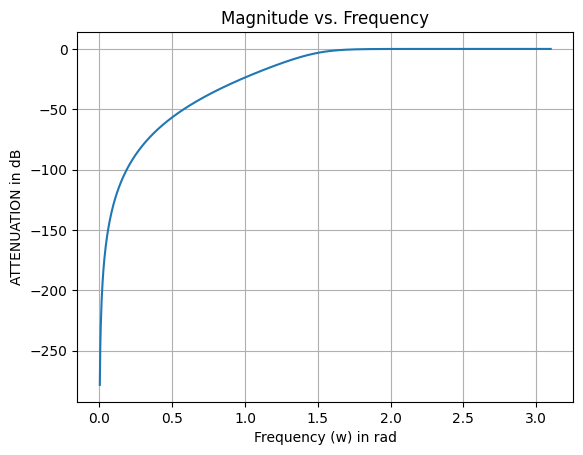

In [2]:
T=1
wc = 1.884
 # Define the frequency range
w_values = np.linspace(0, 3.1, 1000) # Adjust the range as needed
 # Calculate z and s
jw = 1j * w_values
z = np.exp(-jw)
s = (2 / T) * ((1- z ** (-1)) / (1 + z ** (-1)))
 # Calculate Hs_un
Hs_un = (s**5)/ ((wc + s) * ((wc)**2 + 0.61803 *(wc*s) + s**2) * ((wc)**2 + 1.61803 *(wc*s)  + s**2))
v=10*np.log10(np.abs(Hs_un)**2)
 # Plot the magnitude squared of Hs_un
plt.plot(w_values, v)
plt.xlabel('Frequency (w) in rad')
plt.ylabel('ATTENUATION in dB')
plt.title('Magnitude vs. Frequency')
plt.grid(True)
plt.show()

### Phase Spectrum

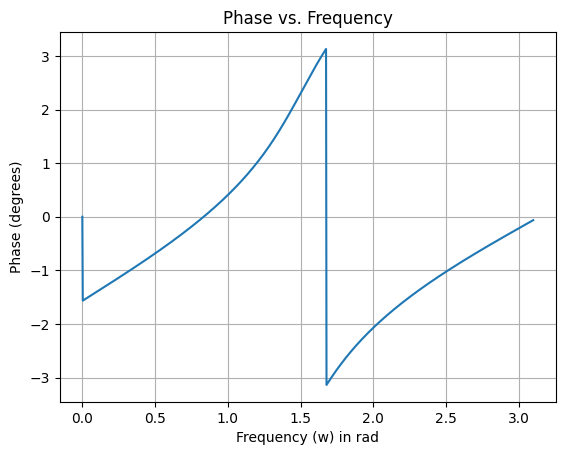

In [3]:
# Calculate the phase of Hs_un manually
phase_Hs_un = np.arctan2(np.imag(Hs_un), np.real(Hs_un))
phase_Hs_un_deg = np.degrees(phase_Hs_un)
# Plot the phase response
plt.plot(w_values, phase_Hs_un)
plt.xlabel('Frequency (w) in rad')
plt.ylabel('Phase (degrees)')
plt.title('Phase vs. Frequency')
plt.grid(True)
plt.show()

### Plotting the three given signals in Time domain

500


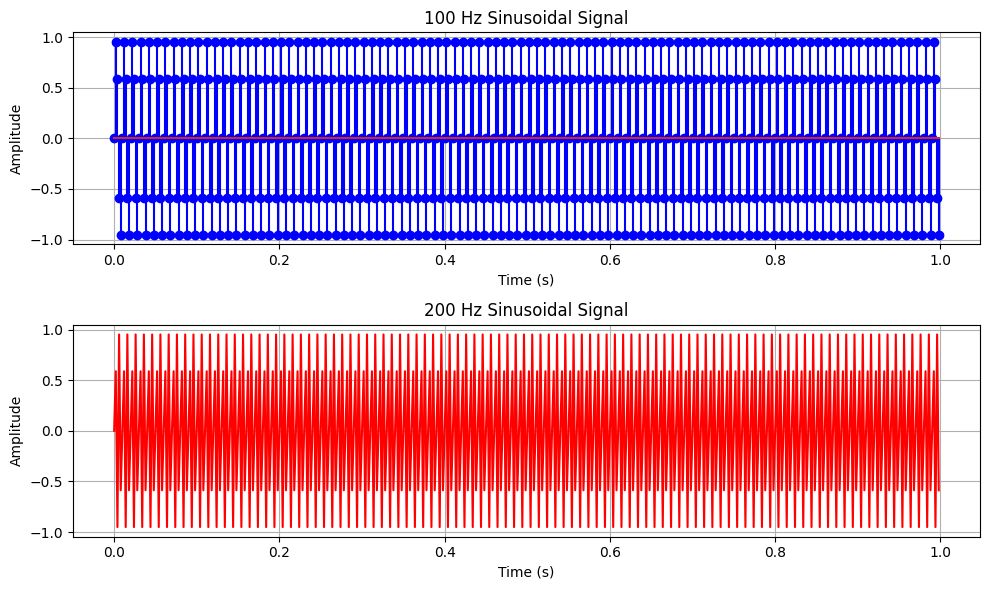

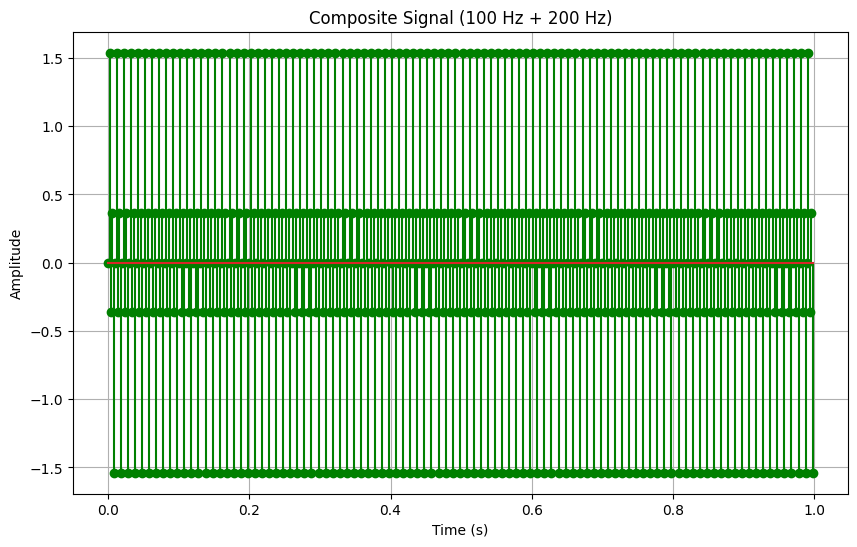

In [30]:
fs = 500  # Hz
t = np.arange(0, 1, 1/fs)  

# Frequency components
f1 = 100  # Hz
f2 = 200  # Hz

# Generate sinusoidal signals
signal_100Hz = np.sin(2 * np.pi * f1 * t)
signal_200Hz = np.sin(2 * np.pi * f2 * t)
print(len(signal_200Hz))

# Plot individual signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(t, signal_100Hz, 'b')
plt.title('100 Hz Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, signal_200Hz, 'r')
plt.title('200 Hz Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# Add the signals together
composite_signal = signal_100Hz + signal_200Hz

# Plot composite signal
plt.figure(figsize=(10, 6))
plt.stem(t, composite_signal, 'g')
plt.title('Composite Signal (100 Hz + 200 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

###  Discrete Fourier Transform (DFT):


The Discrete Fourier Transform (DFT) is a fundamental tool in signal processing and data analysis. It transforms a sequence of complex numbers representing a discrete-time signal into a sequence of complex numbers representing the signal's frequency spectrum. DFT calculation plays a crucial role in various applications, including digital signal processing, image processing, audio analysis, and communication systems.
       
       X(k)=∑x(n)⋅e ^(−j2πkn/N)
where

X(k) is the k-th frequency component of the DFT,

x(n) is the n-th sample of the input signal,

N is the total number of samples in the input signal,

j is the imaginary unit ( j^2 = -1)

e is the base of the natural logarithm,and 

k ranges from 0 to N−1 and represents the frequency bin index.


In [31]:
#Defining the function for DFT Calculation 
def DFT(x_n,N):
  length=len(x_n)
  n=np.arange(N)
  X_k=[]
  for k in range(N):
    e= np.exp(-1j*2*np.pi*k*n/N)
    X_k.append(np.dot(x_n,e))
  return X_k

#### Calculation of DFT and Plotting of 100hz signal

In [32]:
N = len(signal_100Hz)
DFT(signal_100Hz,N)
print(N)

500


#### Magnitude Spectrum of 100hz signal

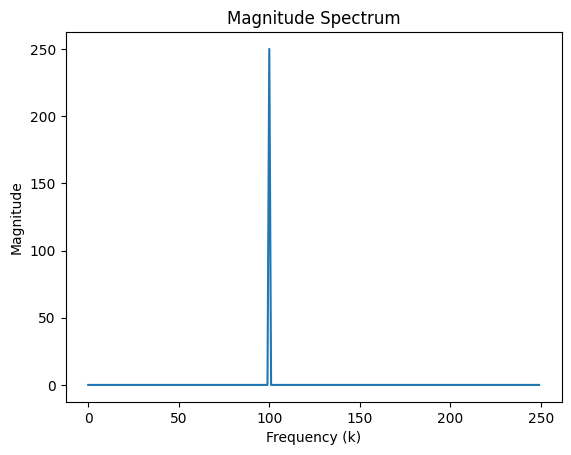

In [37]:
magnitude = np.abs(DFT(signal_100Hz,N))
plt.plot(np.arange(len(DFT(signal_100Hz,N))//2), magnitude[:250])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')

# phase_spectrum = np.angle(DFT(signal_100Hz,N))

# # Plot the phase spectrum
# plt.figure(figsize=(8, 6))
# plt.plot(phase_spectrum)
# plt.title('Phase Spectrum')
# plt.xlabel('Frequency (k)')
# plt.ylabel('Phase (radians)')
# plt.grid(True)
plt.show()
    

#### Calculation of DFT and Plotting  of 200hz signal

In [34]:
N = len(signal_200Hz)
DFT(signal_200Hz,N)
print(N)

500


#### Magnitude Spectrum of 200hz signal

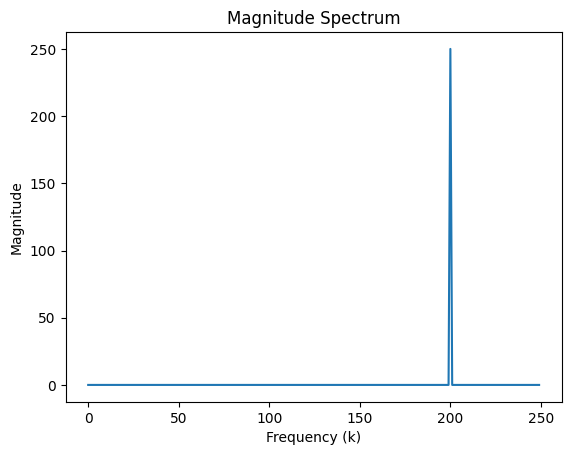

In [35]:
magnitude = np.abs(DFT(signal_200Hz,N))
plt.plot(np.arange(len(DFT(signal_200Hz,N))/2), magnitude[:250])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.show()


In [38]:
N = len(composite_signal)
DFT(composite_signal,N)
print(N)

500


Text(0, 0.5, 'Magnitude')

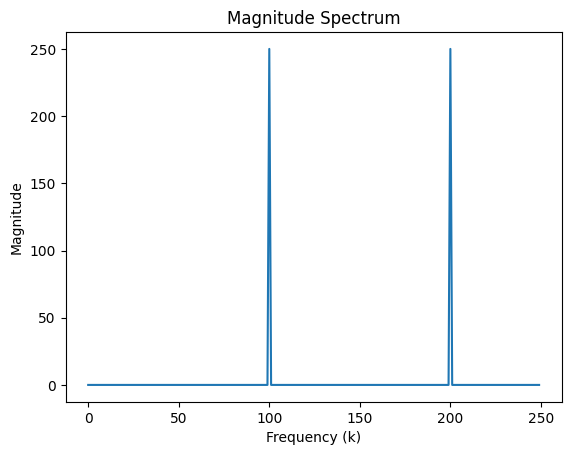

In [39]:
magnitude = np.abs(DFT(composite_signal,N))
plt.plot(np.arange(len(DFT(composite_signal,N))/2), magnitude[:250])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')

# phase_spectrum = np.angle(DFT(composite_signal,N))

# # Plot the phase spectrum
# plt.figure(figsize=(8, 6))
# plt.plot(phase_spectrum)
# plt.title('Phase Spectrum')
# plt.xlabel('Frequency (k)')
# plt.ylabel('Phase (radians)')
# plt.grid(True)
# plt.show()

###  Pass the generated signal to the designed filter to get the outputs

In [40]:
# Define the coefficients of the filter

b = np.array([0.02193962, -0.1096981 ,  0.21939621, -0.21939621 , 0.1096981 , -0.02193962])  # Coefficients of the numerator (feedforward) filter
a = np.array([1,0.98532524,0.97384933,0.38635656,0.11116384,0.01126351])  # Coefficients of the denominator (feedback) filter

# Initialize the filtered signal
filtered_signal = np.zeros_like(composite_signal)


# Perform the filtering operation
for i in range(len(composite_signal)):
    for j in range(len(b)):
        if i - j >= 0:
            filtered_signal[i] += b[j] * composite_signal[i - j]

    for j in range(1, len(a)):
        if i - j >= 0:
            filtered_signal[i] -= a[j] * filtered_signal[i - j]

print("Filtered Signal Array:")
print(filtered_signal)
# Now, 'filtered_signal' contains the output of the filtering operation


Filtered Signal Array:
[ 0.          0.0337616  -0.21004421  0.5595194  -0.85072935  0.86777311
 -0.67692804  0.2994246   0.32585186 -0.89517827  1.01151893 -0.73362854
  0.25271637  0.37912829 -0.89575818  0.98293711 -0.71965419  0.26160921
  0.36726419 -0.89494376  0.98902116 -0.72300428  0.25988922  0.36991391
 -0.89527075  0.98773134 -0.72220975  0.2602136   0.36932538 -0.89516665
  0.9880028  -0.72239621  0.26015452  0.36945535 -0.8951965   0.98794612
 -0.72235286  0.26016474  0.36942681 -0.89518844  0.98795785 -0.72236285
  0.26016312  0.36943304 -0.89519053  0.98795545 -0.72236057  0.26016334
  0.36943169 -0.89519001  0.98795594 -0.72236109  0.26016332  0.36943198
 -0.89519014  0.98795584 -0.72236097  0.26016332  0.36943192 -0.8951901
  0.98795586 -0.72236099  0.26016332  0.36943193 -0.89519011  0.98795585
 -0.72236099  0.26016332  0.36943193 -0.89519011  0.98795585 -0.72236099
  0.26016332  0.36943193 -0.89519011  0.98795585 -0.72236099  0.26016332
  0.36943193 -0.89519011  0.9

#### Calculation of DFT and Plotting of filtered_signal

In [42]:
N = len(filtered_signal)
DFT(filtered_signal,N)

[(-0.5348998023032137+0j),
 (-0.5349035355544479-0.0033837154671537625j),
 (-0.534914739343757-0.006767749934997059j),
 (-0.5349334257806485-0.01015242228230371j),
 (-0.5349596150565502-0.013538051143342465j),
 (-0.5349933354581402-0.016924954783959535j),
 (-0.5350346233860059-0.02031345097565826j),
 (-0.5350835233784008-0.023703856866921724j),
 (-0.5351400881403343-0.027096488851299505j),
 (-0.5352043785774094-0.03049166243126944j),
 (-0.5352764638347061-0.03388969207745682j),
 (-0.5353564213406817-0.037290891082227204j),
 (-0.5354443368552637-0.040695571407266165j),
 (-0.5355403045222289-0.04410404352381056j),
 (-0.5356444269266354-0.04751661624570261j),
 (-0.5357568151549054-0.05093359655318952j),
 (-0.5358775888599905-0.0543552894083833j),
 (-0.5360068763286372-0.05778199755917268j),
 (-0.5361448145518928-0.06121402133375861j),
 (-0.5362915493002978-0.06465165842167123j),
 (-0.5364472351963651-0.06809520364325852j),
 (-0.5366120357951731-0.07154494870463085j),
 (-0.5367861236610063

#### Magnitude and Phase spectrum of Filtered Signal

Text(0, 0.5, 'Magnitude')

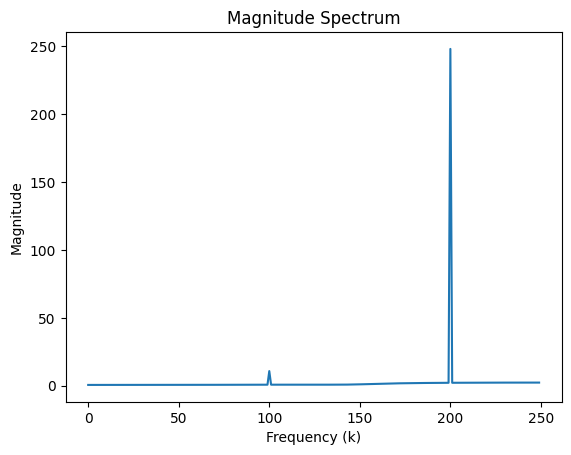

In [44]:
magnitude = np.abs(DFT(filtered_signal,N))
plt.plot(np.arange(len(DFT(filtered_signal,N))/2), magnitude[:250])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')

# phase_spectrum = np.angle(DFT(filtered_signal,N))

# # Plot the phase spectrum
# plt.figure(figsize=(8, 6))
# plt.plot(phase_spectrum)
# plt.title('Phase Spectrum')
# plt.xlabel('Frequency (k)')
# plt.ylabel('Phase (radians)')
# plt.grid(True)
# plt.show()

#  **IMPLEMENTING USING INBUILT FUNCTIONS**

Filter Coefficients:
b = [ 0.02193962 -0.1096981   0.21939621 -0.21939621  0.1096981  -0.02193962]
a = [1.         0.98532524 0.97384933 0.38635656 0.11116384 0.01126351]


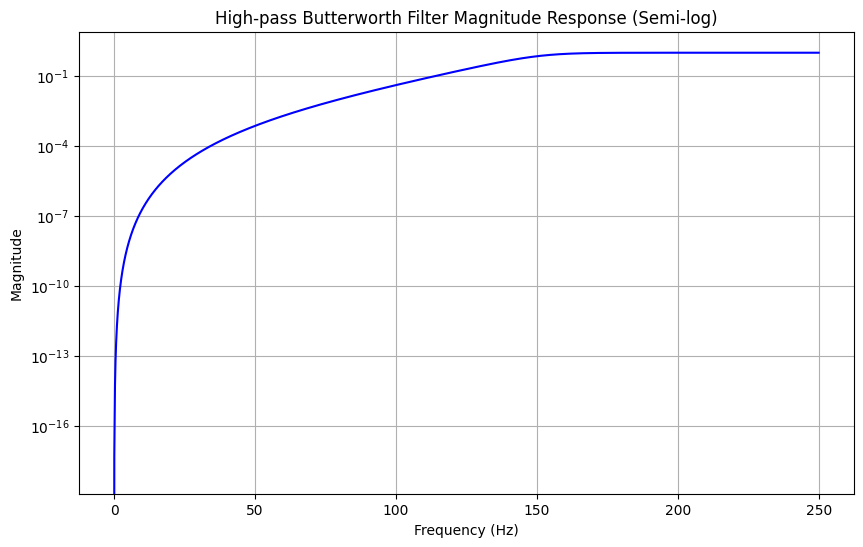

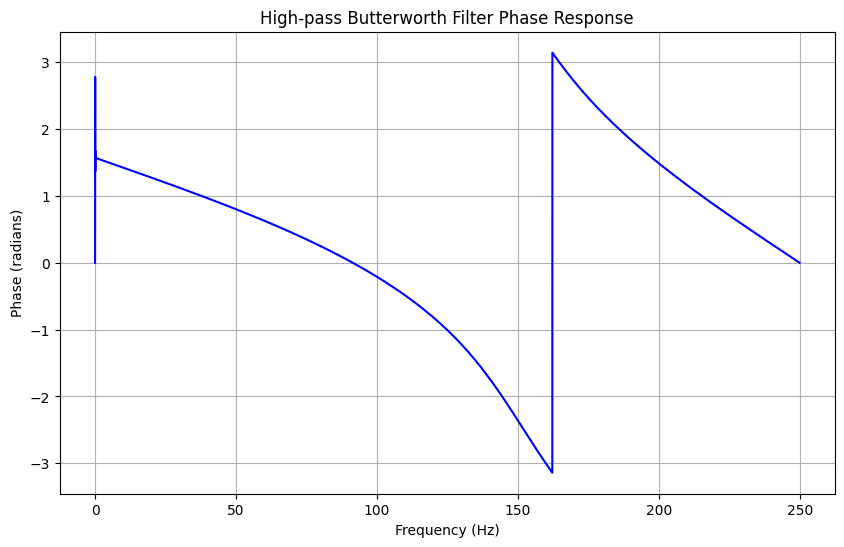

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, butter, lfilter

# Sampling frequency and cutoff frequency
fs = 500  # Hz
fc = 150  # Hz
order = 5  # Filter order

# Calculate normalized cutoff frequency
fc_norm = fc / (fs / 2)
# Design the filter
b, a = butter(order, fc_norm, btype='high', analog=False)

# Print filter coefficients
print("Filter Coefficients:")
print("b =", b)
print("a =", a)

# Frequency response
w, h = freqz(b, a, worN=8000, fs=fs)

# Magnitude plot in semi-log scale
plt.figure(figsize=(10, 6))
plt.semilogy(w, np.abs(h), 'b')
plt.title('High-pass Butterworth Filter Magnitude Response (Semi-log)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Phase plot
plt.figure(figsize=(10, 6))
plt.plot(w, np.angle(h), 'b')
plt.title('High-pass Butterworth Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()


### PlOTTING OF MAGNITUDE AND PHASE SPECTRUM USING INBUILT FUNCTIONS

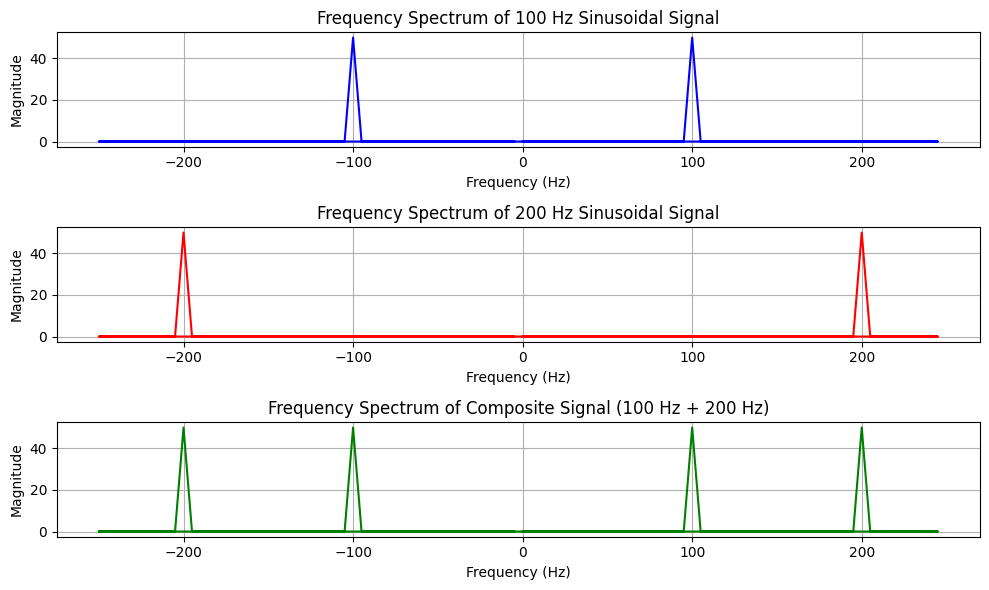

In [2]:
# Sampling frequency and time array
fs = 500  # Hz
t = np.arange(0, 0.2, 1/fs)  # 10 second duration

# Frequency components
f1 = 100  # Hz
f2 = 200  # Hz

# Generate sinusoidal signals
signal_100Hz = np.sin(2 * np.pi * f1 * t)
signal_200Hz = np.sin(2 * np.pi * f2 * t)

# Add the signals together
composite_signal = signal_100Hz + signal_200Hz


# Compute Fourier Transform
freq = np.fft.fftfreq(len(t), 1/fs)  # Frequency axis
fft_signal_100Hz = np.fft.fft(signal_100Hz)
fft_signal_200Hz = np.fft.fft(signal_200Hz)
fft_composite_signal = np.fft.fft(composite_signal)

# Plot frequency spectrum
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_signal_100Hz), 'b')
plt.title('Frequency Spectrum of 100 Hz Sinusoidal Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freq, np.abs(fft_signal_200Hz), 'r')
plt.title('Frequency Spectrum of 200 Hz Sinusoidal Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freq, np.abs(fft_composite_signal), 'g')
plt.title('Frequency Spectrum of Composite Signal (100 Hz + 200 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()


####   Pass the generated signal to the designed filter to get the output and Plotting the time and frequency domain representation of the filtered signal using inbuilt function

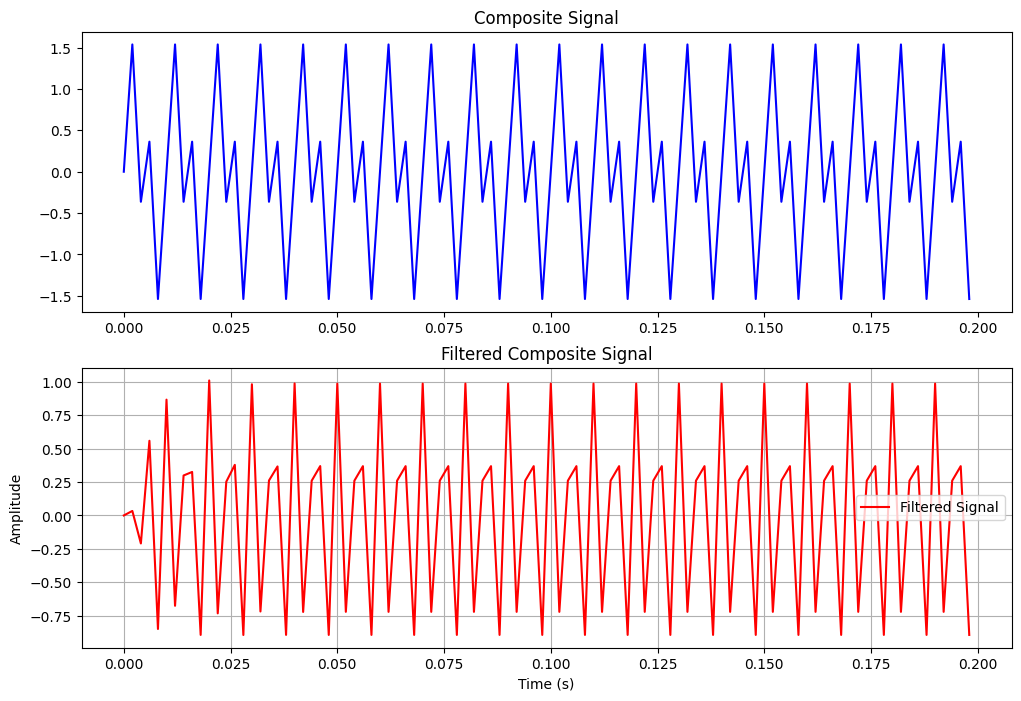

<Figure size 1000x600 with 0 Axes>

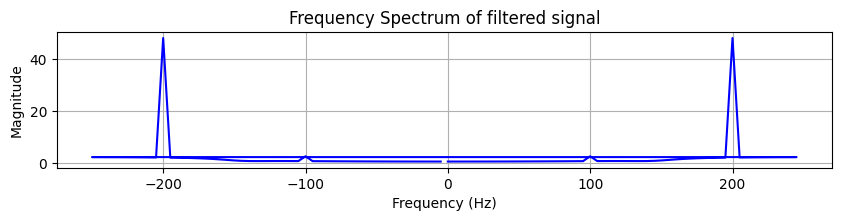

<Figure size 1000x600 with 0 Axes>

In [3]:
# Apply Butterworth filter to composite signal
filtered_signal = lfilter(b, a, composite_signal)

# Plot original and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(t, composite_signal, 'b', label='Original Signal')
plt.title('Composite Signal')
plt.subplot(2,1,2)
plt.plot(t, filtered_signal, 'r', label='Filtered Signal')
plt.title('Filtered Composite Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Compute Fourier Transform
freq = np.fft.fftfreq(len(t), 1/fs)  # Frequency axis
fft_filtered_signal = np.fft.fft(filtered_signal)

# Plot frequency spectrum
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(freq, np.abs(fft_filtered_signal), 'b')
plt.title('Frequency Spectrum of filtered signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.figure(figsize=(10, 6))

# plt.subplot(4, 1, 1)
# plt.plot(freq, np.angle(fft_filtered_signal), 'b')
# plt.title('Phase Spectrum of filtered signal')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('PHASE')
# plt.grid()